In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
feature_names = load_headers(DATA_TRAIN_PATH)

In [18]:
# signals and backgrounds
sig = np.where(y==1)[0]
back = np.where(y==-1)[0]
tX_sig = tX[sig,:]
tX_back = tX[back,:]

## Regrouping data

In [234]:
# Regouping data
## Find the index of each group based on PRI_jet_num
idx0 = np.where(tX[:,22]==0)[0]
idx1 = np.where(tX[:,22]==1)[0]
idx23 = np.where(tX[:,22]>1)[0]

## Regroup
y0 = y[idx0]
tX0 = tX[idx0,:]

y1 = y[idx1]
tX1 = tX[idx1,:]

y23 = y[idx23]
tX23 = tX[idx23,:]

## Clean undefined features of each group (still keep null in DER_mass_MMC)
null_idx_0 = [ 4,  5,  6, 12, 22, 23, 24, 25, 26, 27, 28,29]
null_idx_1 = [ 4,  5,  6, 12, 22, 26, 27, 28]
null_idx_23 = [22]

tX0 = np.delete(tX0,null_idx_0,1)
tX1 = np.delete(tX1,null_idx_1,1)
tX23 = np.delete(tX23,null_idx_23,1)

## Recount the number of feature of each group
n_feature_0, n_feature_1, n_feature_23 = (tX0.shape[1], tX1.shape[1], tX23.shape[1])

## data_size of each group
n_0 , n_1, n_23 = (len(y0), len(y1), len(y23))

## Clear outliers and standarlize

In [235]:
def out_cleaner(tx,method='mean'):
    tx_mean = np.mean(tx)
    tx_std = np.std(tx)
    out_idx = np.where(np.abs(tx-tx_mean) > 3*tx_std)[0]
    good_idx = np.where(np.abs(tx-tx_mean) < 3*tx_std)[0]
    if method == 'mean':
        tx[out_idx]= np.mean(tx[good_idx])
    elif method == 'median':
        tx[out_idx] = np.median(tx[good_idx])
    elif method == 'cloest':
        out_pos_idx = np.where(tx-tmean > 3*tx_std)[0]
        out_neg_idx = np.where(tx-tmean > 3*tx_std)[0]
        tx[out_pos_idx] = np.max(tx[good_idx])
        tx[out_neg_idx] = np.min(tx[good_idx])
    return (tx-tx_mean)/tx_std # standarlization

In [236]:
# clear outliers
for ite,tx in enumerate(tX0.T):
    tX0[:,ite] = out_cleaner(tx)
for ite,tx in enumerate(tX1.T):
    tX1[:,ite] = out_cleaner(tx)
for ite,tx in enumerate(tX23.T):
    tX23[:,ite] = out_cleaner(tx)

## Feature visulization

In [237]:
y

array([ 1., -1., -1., ...,  1., -1., -1.])

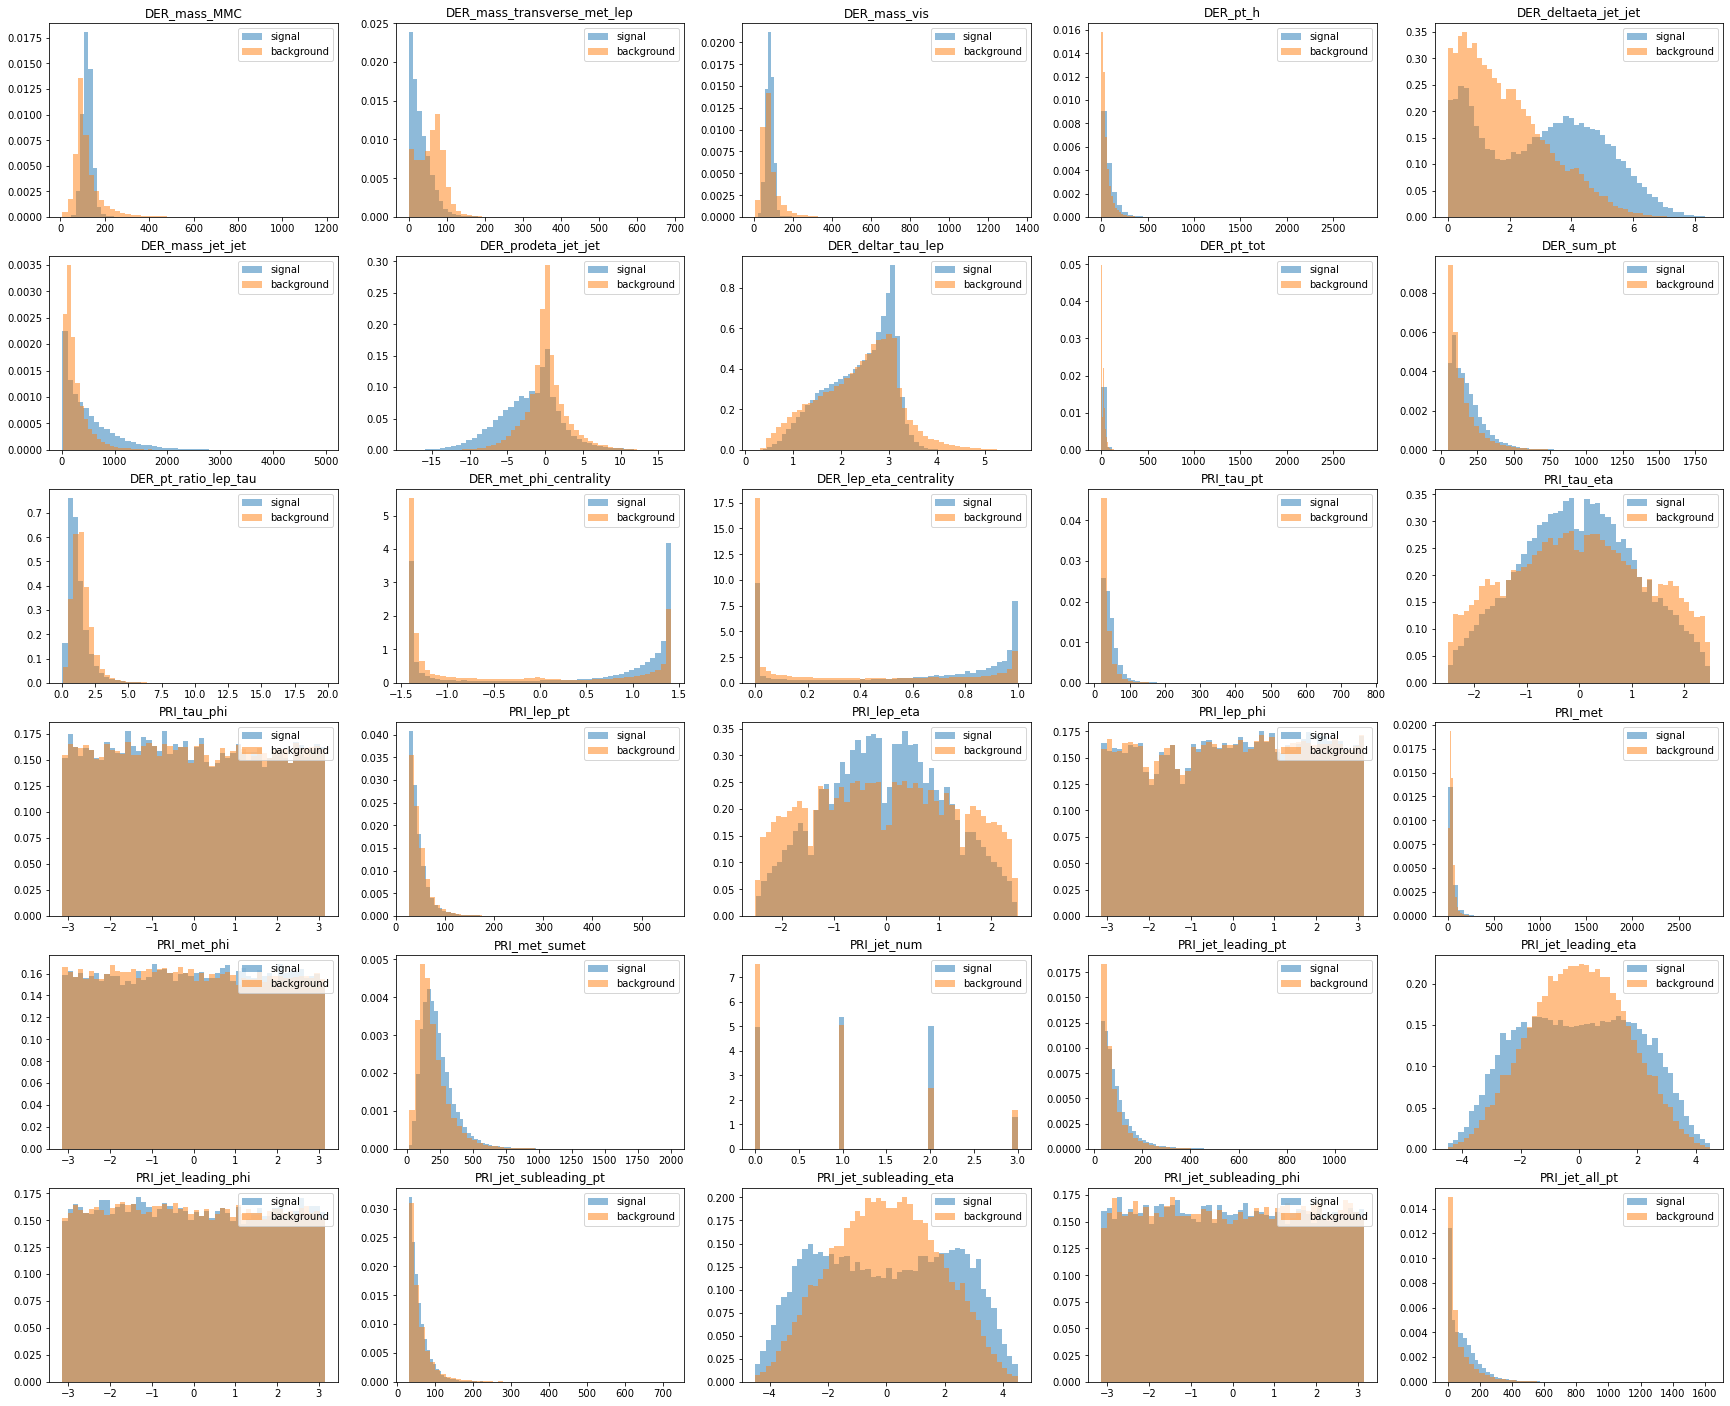

In [22]:
num_row = 6
num_col = 5
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
#for feature in tX.T:
    #axs.hist(feature, density=True, bins=100);
for idx,ax in enumerate(axs):
    good_sig = np.where(tX_sig[:,idx]>-999)[0]
    ax.hist(tX_sig[good_sig,idx],density=True, bins=50,alpha=0.5,label = 'signal')
    good_back = np.where(tX_back[:,idx]>-999)[0]
    ax.hist(tX_back[good_back,idx],density=True, bins=50,alpha=0.5,label = 'background')
    ax.legend(loc='upper right')
    ax.set_title(feature_names[idx])

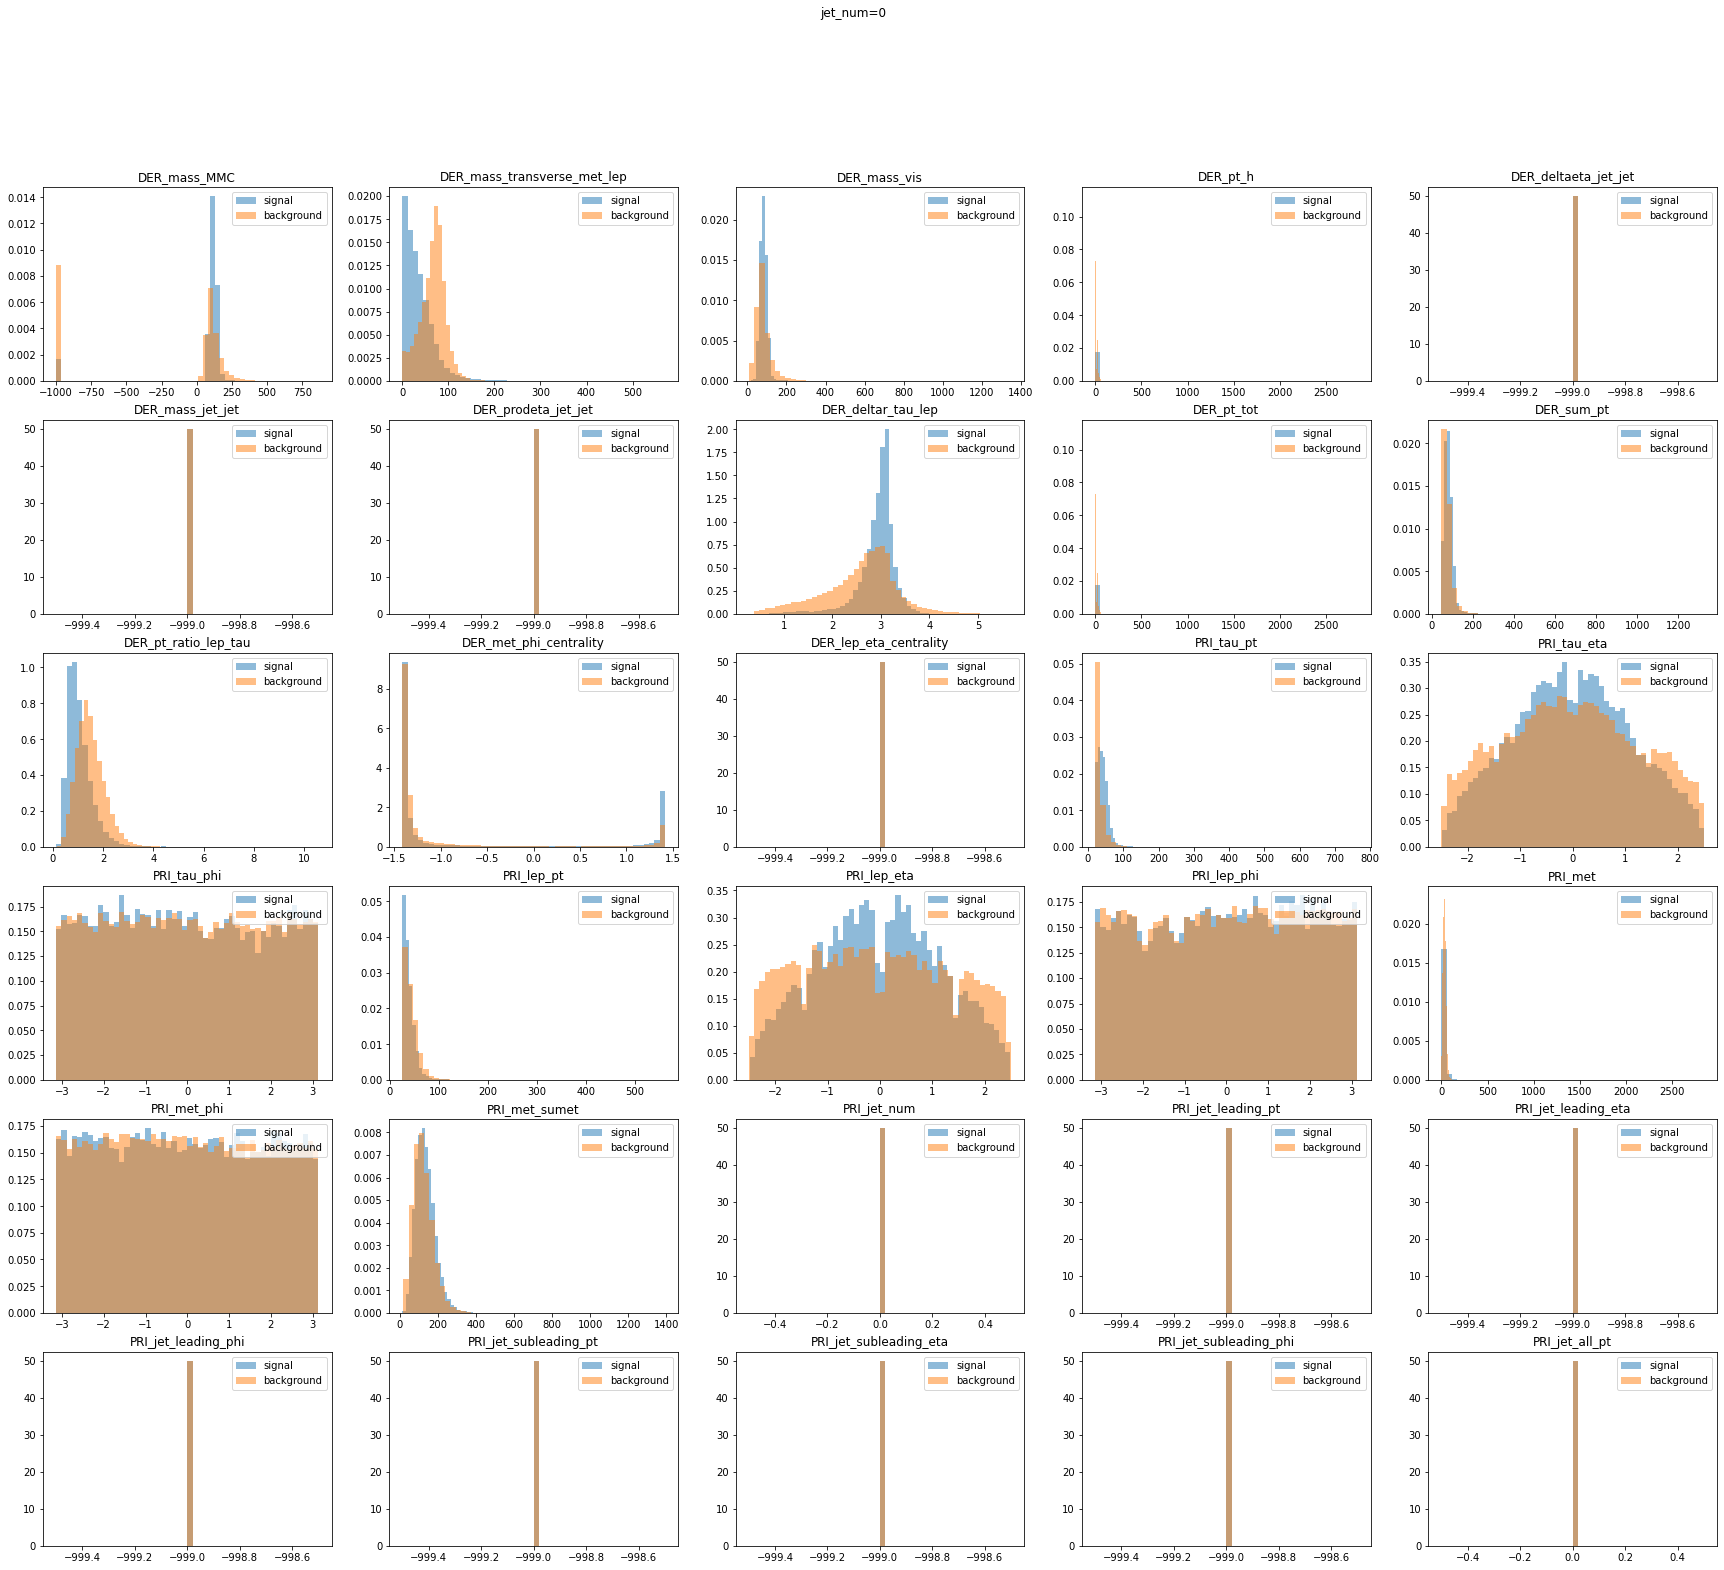

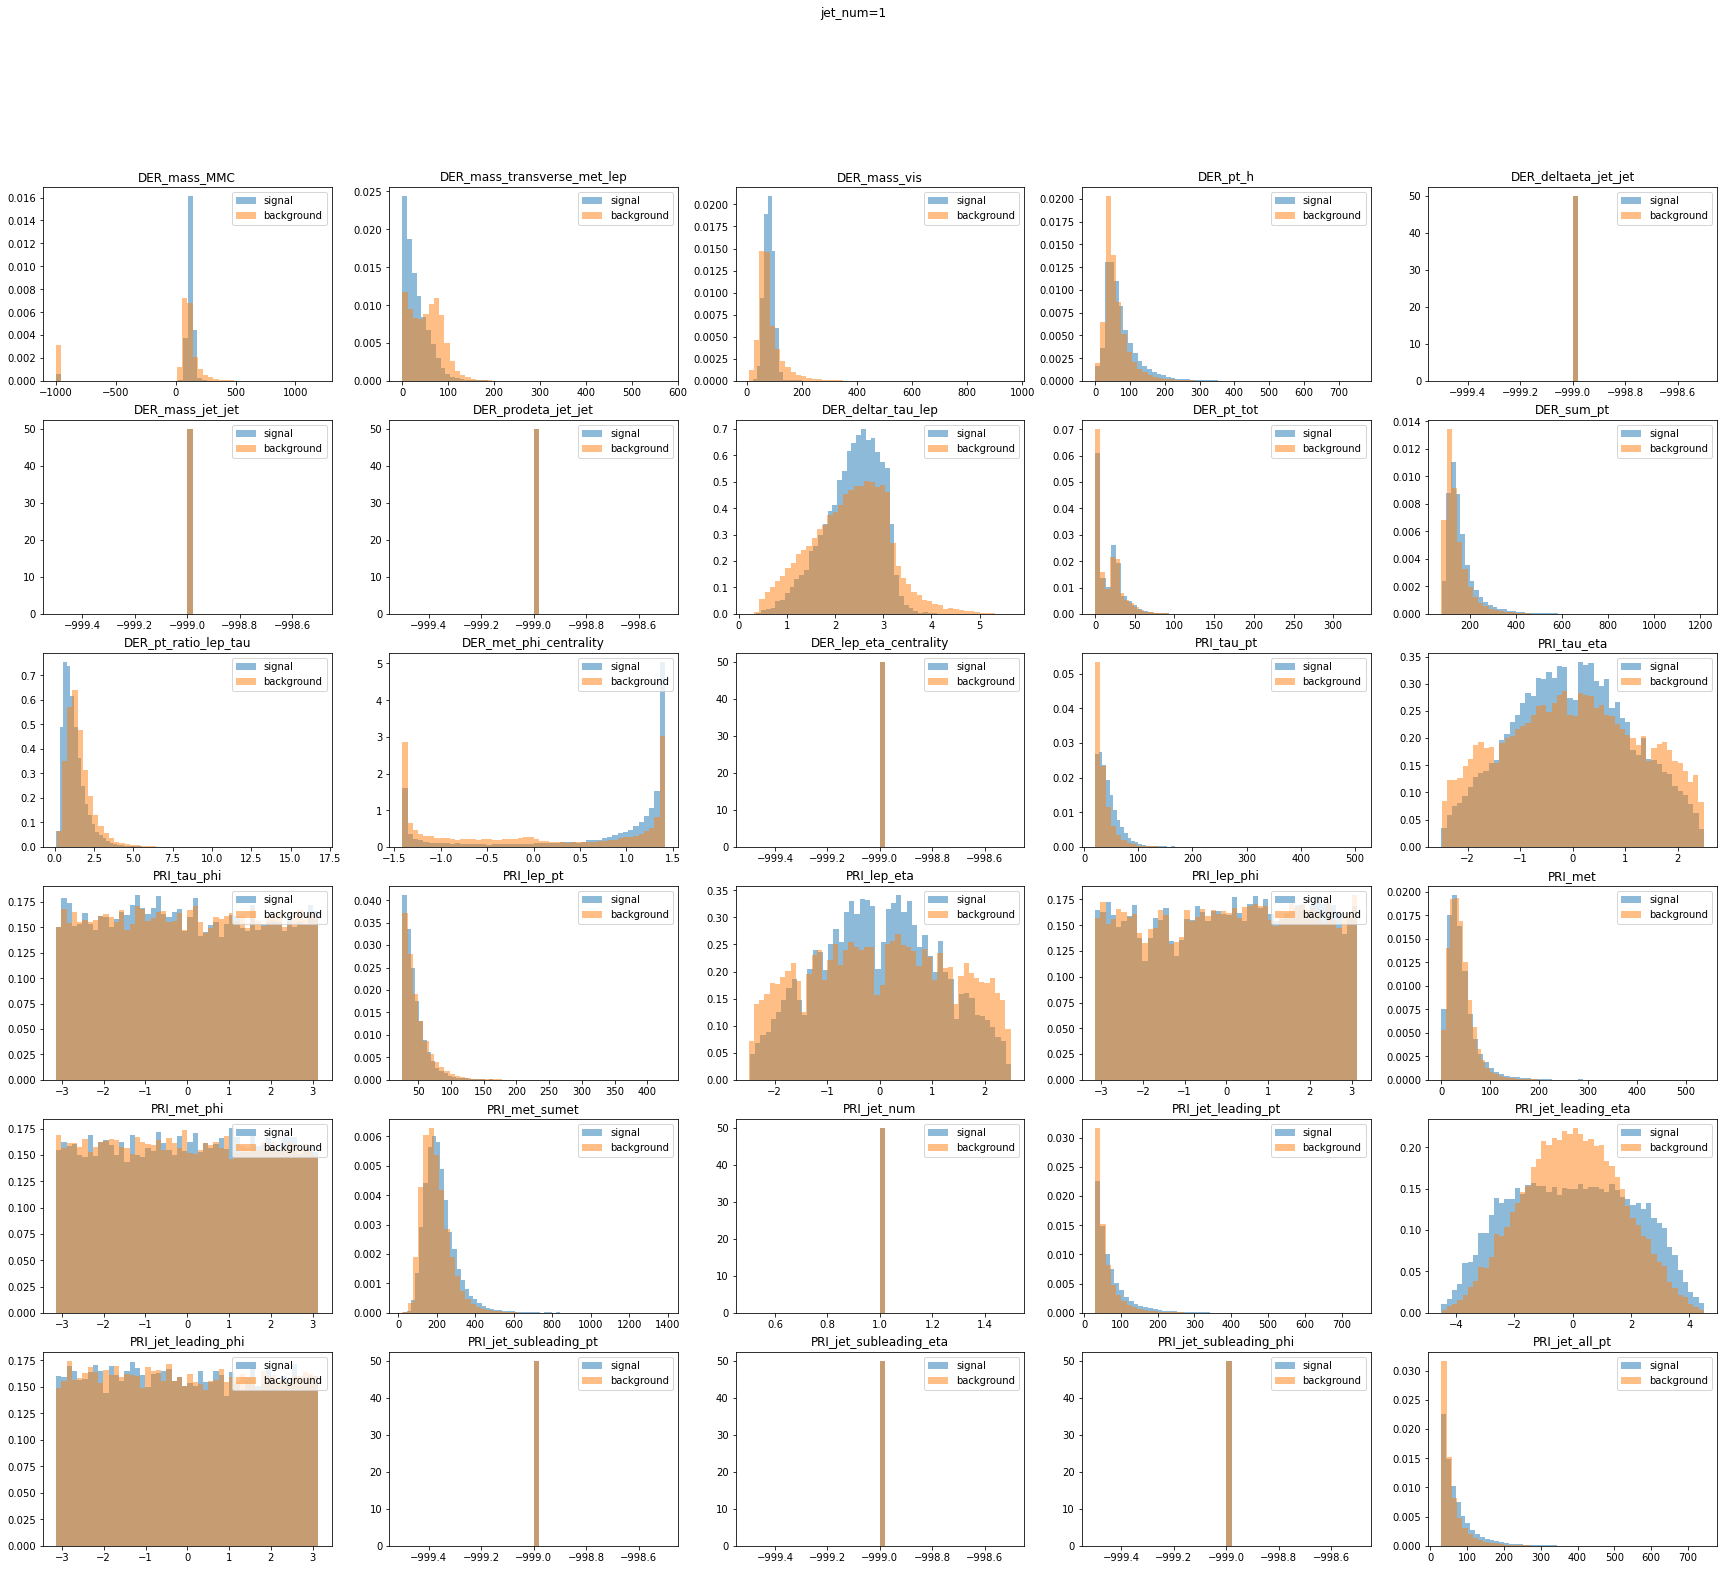

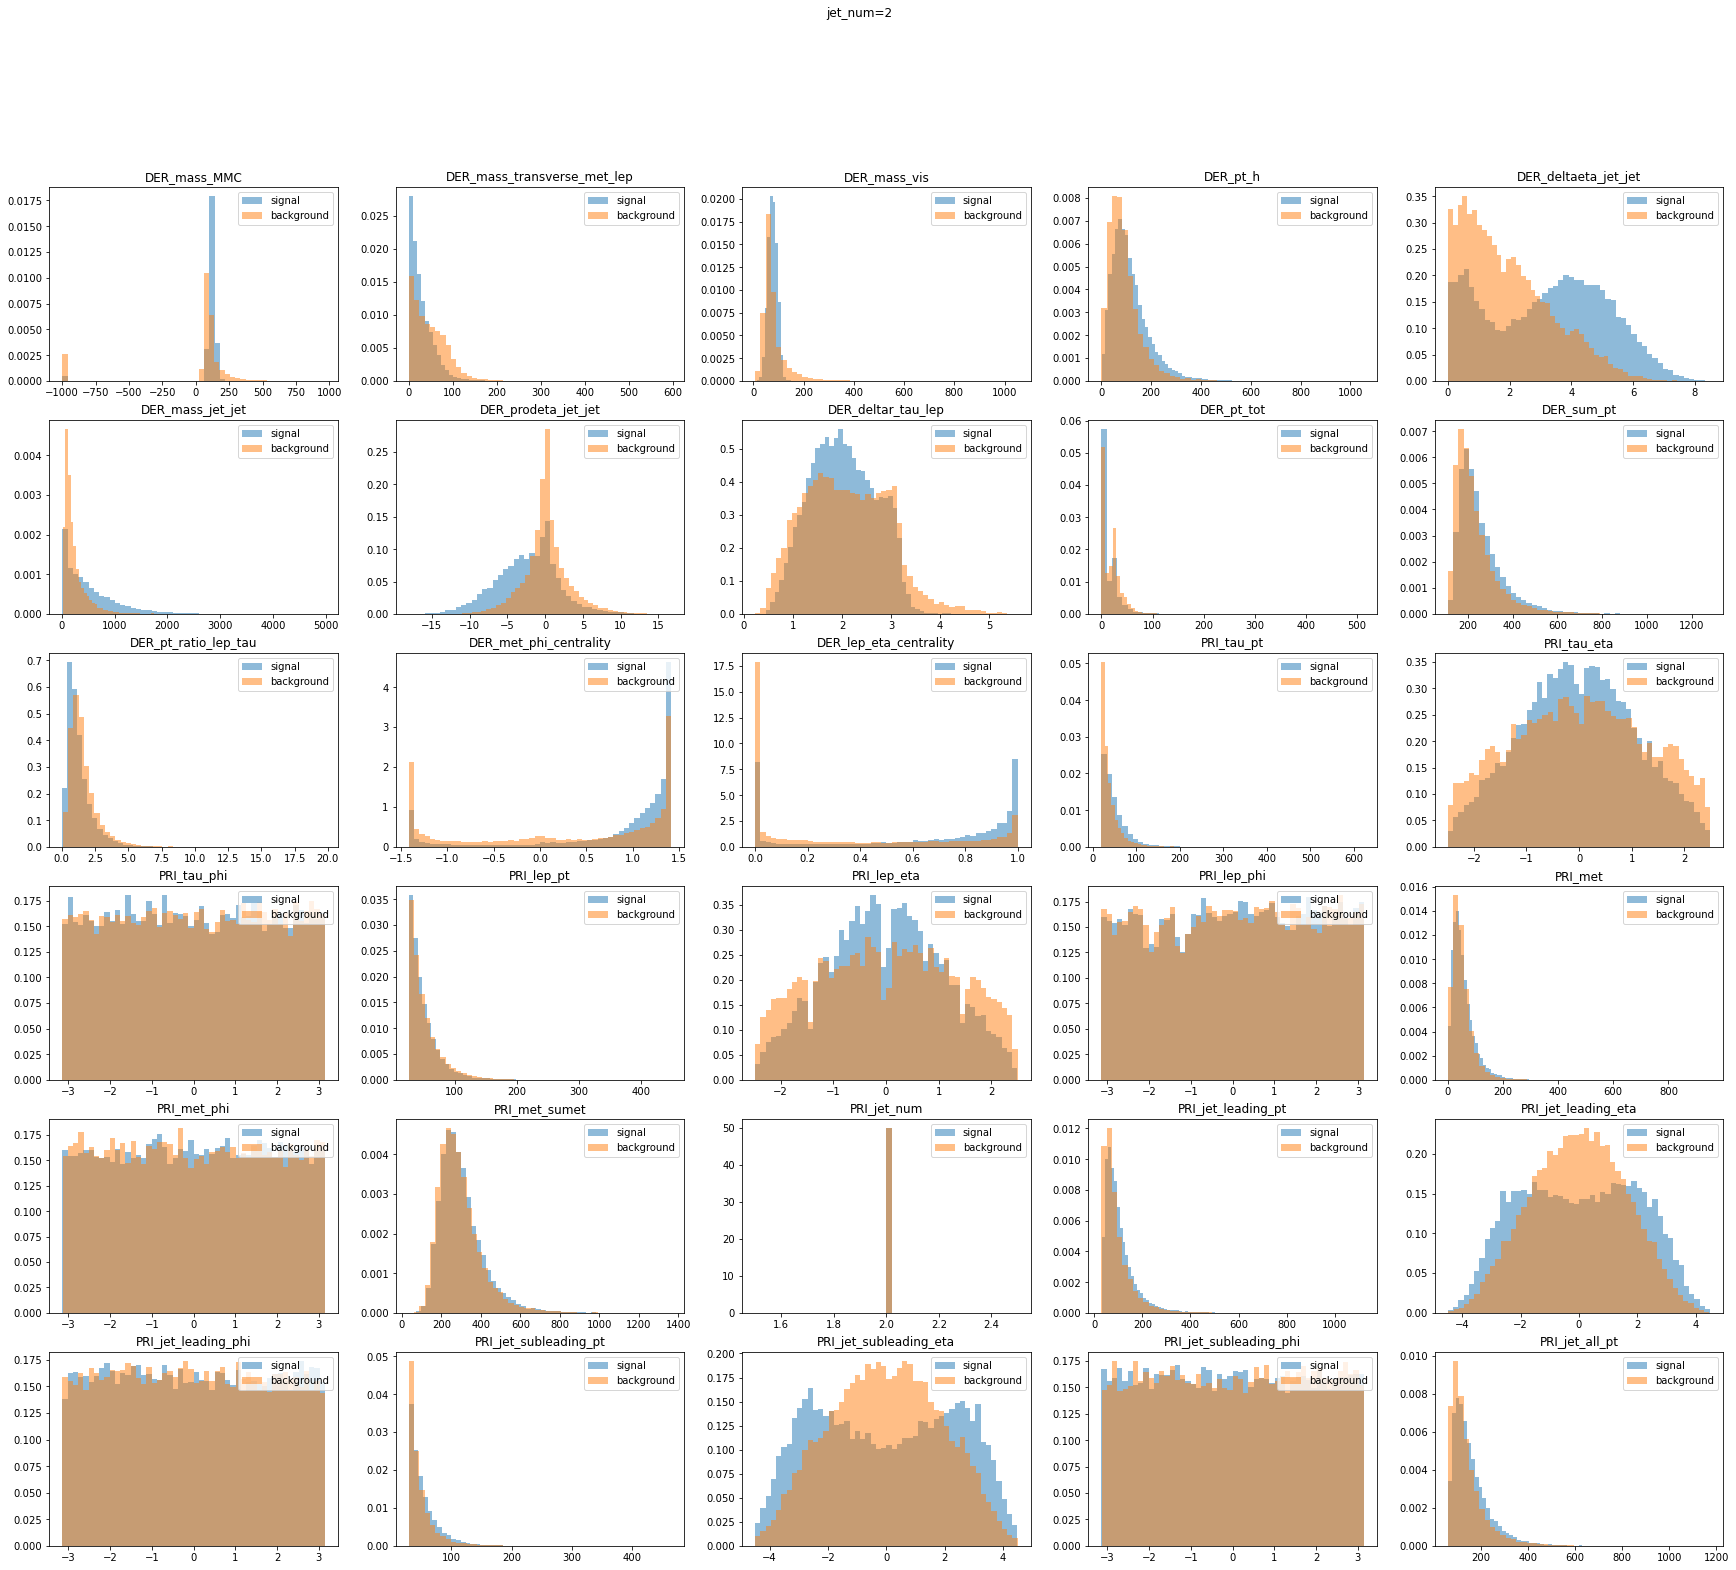

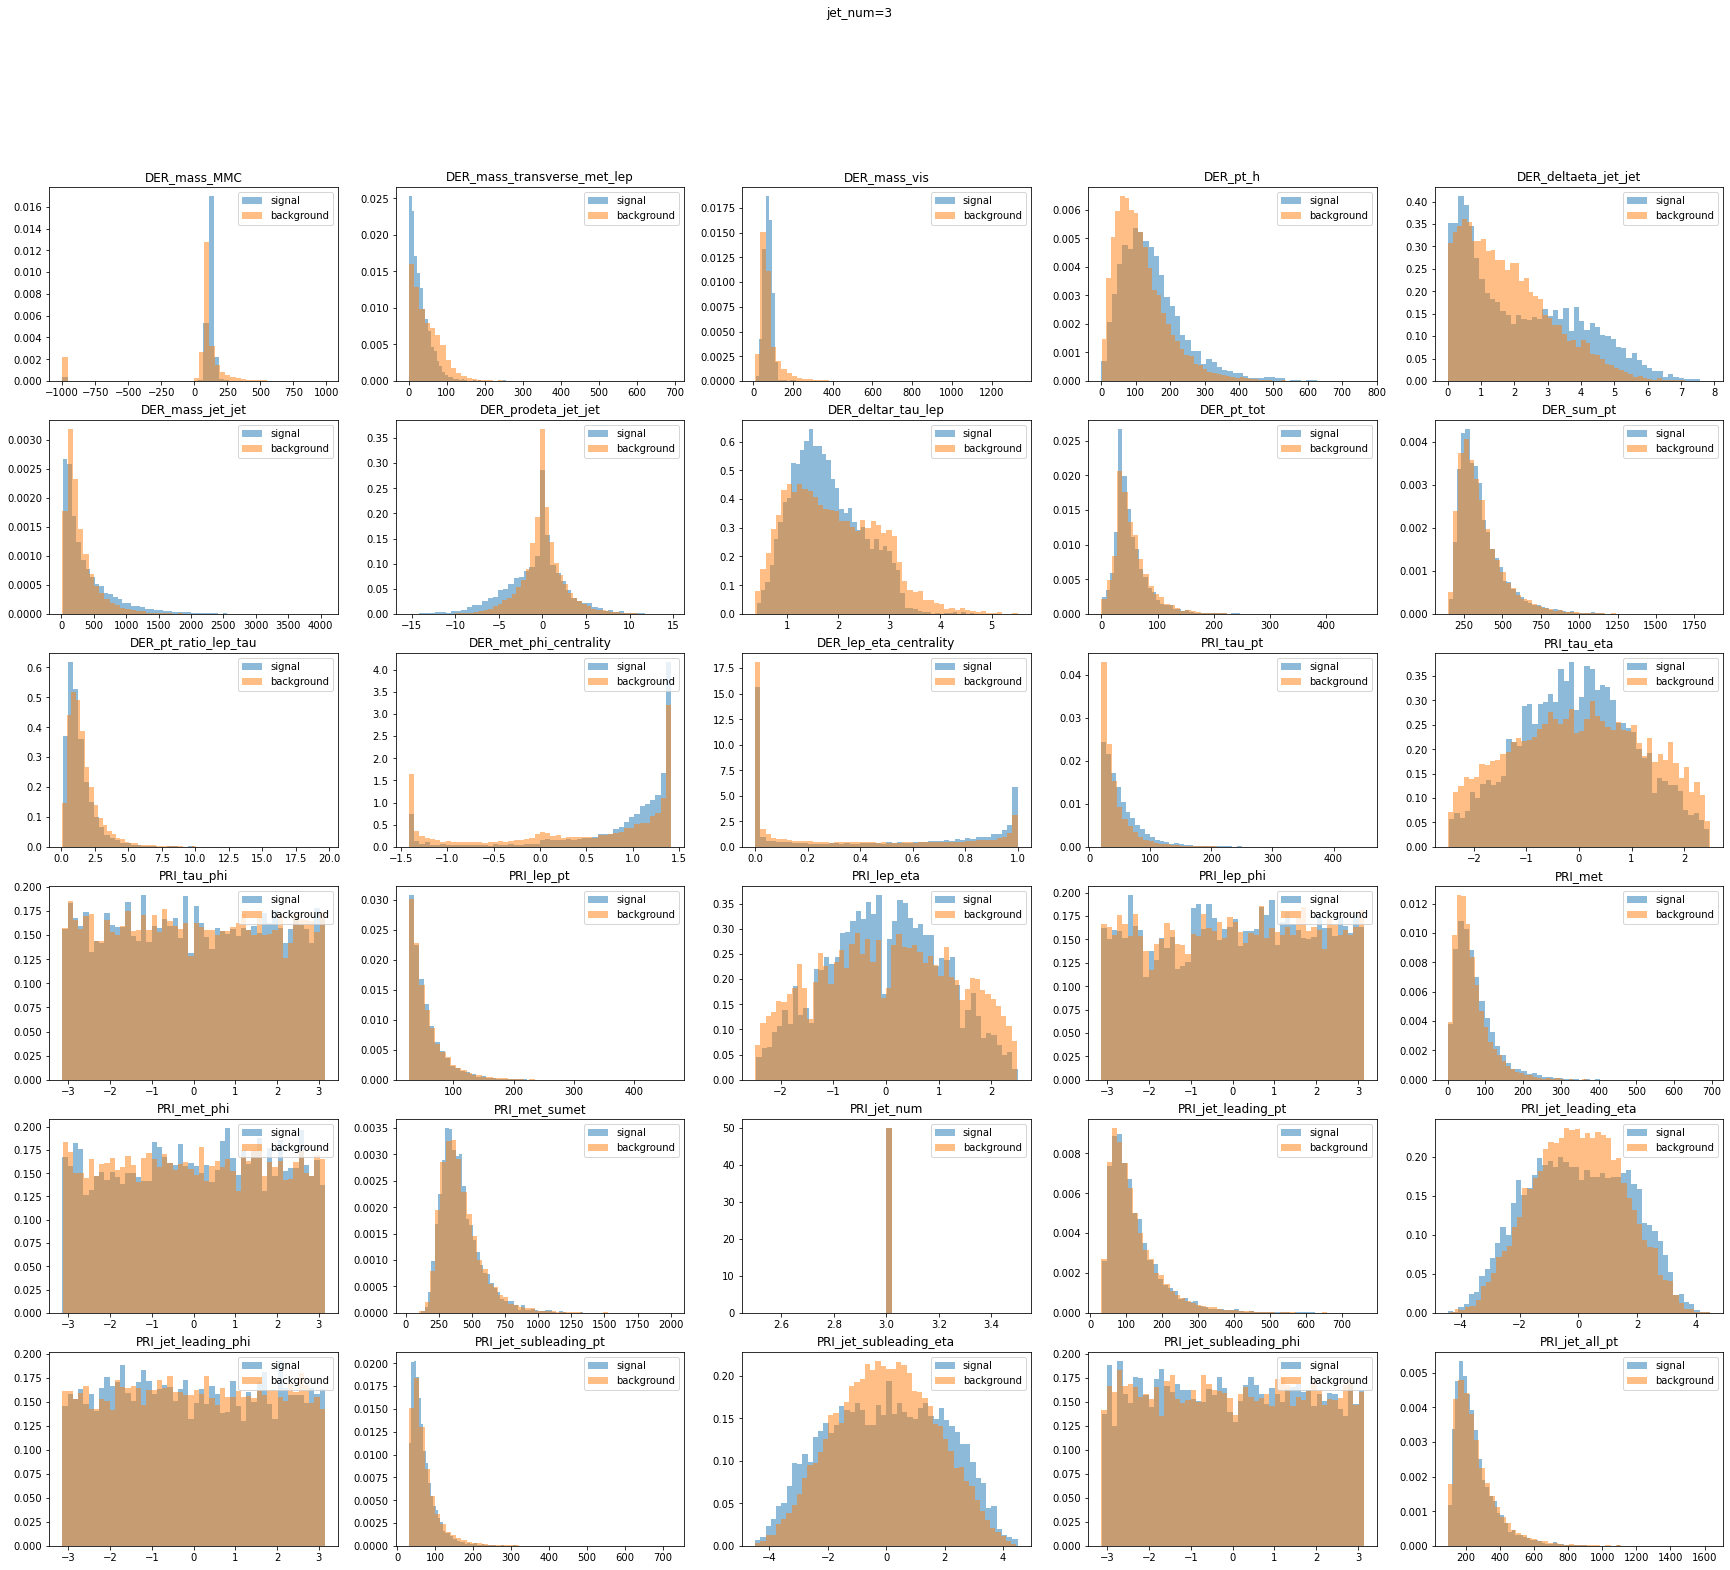

In [47]:
num_row = 6
num_col = 5
jet_nums_ = [0,1,2,3]
for jet_num in jet_nums_:
    f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
    axs = axs.ravel()

    for idx,ax in enumerate(axs):
        ax.hist(tX_sig[np.where(tX_sig[:,22]==jet_num)[0],idx],density=True, bins=50,alpha=0.5,label = 'signal')
        ax.hist(tX_back[np.where(tX_back[:,22]==jet_num)[0],idx],density=True, bins=50,alpha=0.5,label = 'background')
        ax.legend(loc='upper right')
        ax.set_title(feature_names[idx])
    f.suptitle('jet_num=%i'%jet_num);

(array([4.95951378, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 5.39102961, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 5.00659531, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.30952798]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.

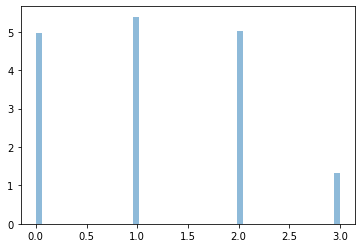

In [39]:
num_row = 6
num_col = 5
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
#for feature in tX.T:
    #axs.hist(feature, density=True, bins=100);
for idx,ax in enumerate(axs):
    ax.hist(tX_sig[np.where(tX_sig==,idx],density=True, bins=50,alpha=0.5,label = 'signal')
    ax.hist(tX_back[:,idx],density=True, bins=50,alpha=0.5,label = 'background')
    ax.legend(loc='upper right')
    ax.set_title(feature_names[idx])


(array([4.95951378, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 5.39102961, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 5.00659531, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.30952798]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.

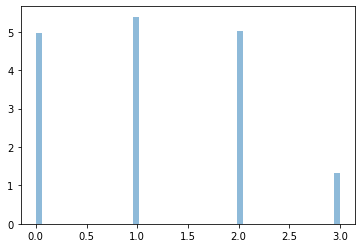

In [40]:
plt.hist(tX_sig[:,22],density=True, bins=50,alpha=0.5,label = 'signal')

In [42]:
tX_sig[:,22]==1

array([False, False,  True, ...,  True, False,  True])

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)